In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Ejercicio 2: Delfines

In [5]:
# Leemos el archivo
myFolder=(os.getcwd()+'/tc01_data/') #busca en el directorio actual

# Primero creamos la red de delfines. Agregando los enlaces se agregan automaticamente los nodos
mydolphins = nx.read_gml(myFolder+'new_dolphins.gml')

# Ahora creamos dos listas: una de nombres de delfines (nodos) y otra de los generos correspondientes
Gender = pd.read_csv(myFolder+'dolphinsGender.txt', sep='\t', header=None)
delfines = Gender[0] # nombres de delfines (nodos)
genero = Gender[1]   # genero de los delfines

#Delfines sin genero
delfines=[d for i,d in enumerate(Gender[0]) if type(Gender[1][i]) is not float]
genero=[g for i,g in enumerate(Gender[1]) if type(Gender[1][i]) is not float]
delfines_remove= [d for i,d in enumerate(Gender[0]) if type(Gender[1][i]) is float]    

# A cada uno de los nodos se le agrega el genero y ademas eliminamos los delfines sin genero:
for d,g in zip(delfines,genero):    
    mydolphins.add_node(d, gender=g)

for d in delfines_remove:
    mydolphins.remove_node(d)
    

#print mydolphins.nodes['Jet']['gender'] Para ver la prop genero en el delfin 'Jet'


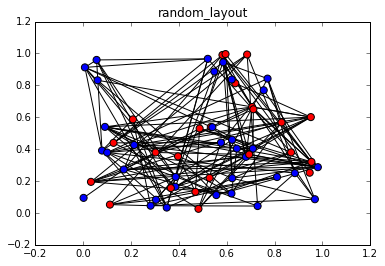

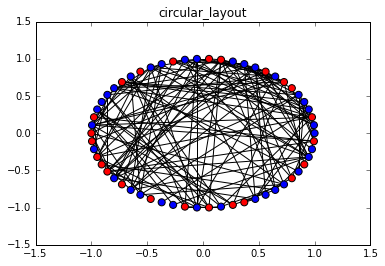

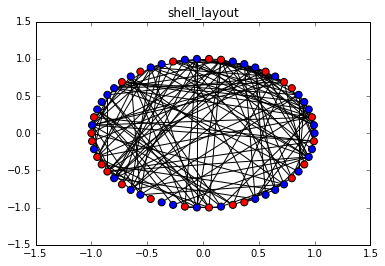

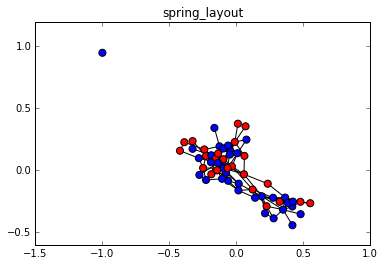

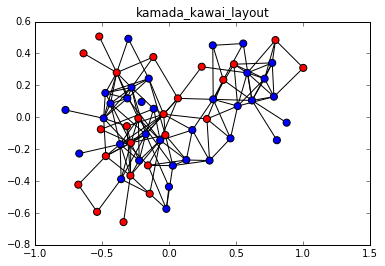

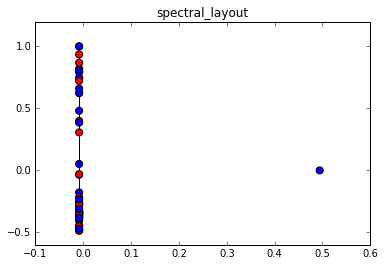

In [6]:
#a) Tipos de Layout

layouts=['random_layout','circular_layout','shell_layout','spring_layout','kamada_kawai_layout','spectral_layout']
# fruchterman reingold es el algoritmo que usa spring

for f,lay in enumerate(layouts):
 plt.figure(f)
 nx.draw_networkx(mydolphins,eval('nx.'+lay)(mydolphins),
        width=1,
        node_color=["blue" if g=="m" else "red" if g=="f" else "green" for g in nx.get_node_attributes(mydolphins, "gender").values()], 
        node_size=50,
        with_labels=False
       )
 plt.title(lay)
plt.show()



Distribucion de enlaces fm:
Valor medio(H null): 72.5118
Desviacion Standar: 5.850577814199209
Valor Red Real: 52
p valor: 0.0009000000000000119


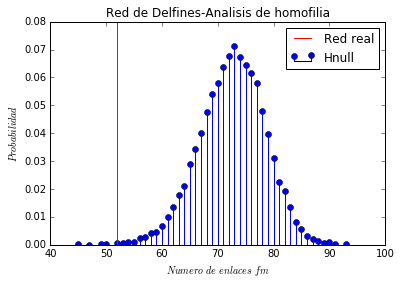

In [7]:
#b)Analisis de la homofilia
Enlaces_fm=[]

#Hacemos num_asignaciones asignaciones aleatorias de genero:
num_asignaciones=10000
for it in range(0,num_asignaciones):

    #Reordenamos el vector de generos
    if it==0:
        genero_shuffle=genero #No lo reordenamos si es el primero de la red real
    else:
        genero_shuffle=genero
        np.random.shuffle((genero_shuffle)) #Reordenamos aleat los generos si no es el primero

    #Reasignamos a cada nodo un valor en el vector de genero_shuffle:
    for d,g in zip(delfines,genero_shuffle):
        mydolphins.add_node(d, gender=g)
        
    #Contamos la fraccion de enlaces que conecta nodos con diferente genero o sea f-m:
    enlaces=list(mydolphins.edges.data())
    enlaces_fm=0 #Ponemos en cero el contador
    #Recorremos los enlaces y nos fijamos cual de ellos es del tipo f-m:
    for i in range(0,len(enlaces)-1):
        genero1=mydolphins.nodes[enlaces[i][0]]['gender']
        genero2=mydolphins.nodes[enlaces[i][1]]['gender']
        if genero1 != genero2:   #Comparamos los generos
            enlaces_fm += 1 #Incrementamos el contador si el enlace es f-m
    Enlaces_fm.append(enlaces_fm) #Guardamos la cantidad de enlaces f-m
#Valor medio y desviacion standar
mean_enlacesfm=np.mean(Enlaces_fm)
desv_enlacesfm=np.std(Enlaces_fm)

#b)ii) Comparación

print ('Distribucion de enlaces fm:')
print ('Valor medio(H null): {}'.format(mean_enlacesfm))
print ('Desviacion Standar: {}'.format(desv_enlacesfm))
print ('Valor Red Real: {}'.format(Enlaces_fm[0]))
  
#b)iii) Histograma y p-valor:
histograma=np.unique(Enlaces_fm,return_counts=True)
k_enlacesfm=histograma[0]
probabilidad=histograma[1]/float(num_asignaciones)

#p-valor: supongamos que sea la probabilidad que queda acumulada a la izq del valor que obtuvimos del numero de enlaces_fm de la red real.
#Buscamos el k_enlacesfm mas cercano al que nos dio la red real.
closestto=Enlaces_fm[0]
theclosest=min(histograma[0], key=lambda x:abs(x-closestto))
theclosest_index=int(np.where(histograma[0] == theclosest)[0])

#Sumamos las probabilidades desde el mas cercano hasta el ultimo hacia la derecha.
pvalue=1-np.sum(probabilidad[theclosest_index :])
print ('p valor: {}'.format(pvalue))


plt.figure()
plt.stem(k_enlacesfm,probabilidad, basefmt='k', label='Hnull')
plt.axvline(Enlaces_fm[0], c="red",label='Red real')#Linea vertical en el valor de la red real
plt.xlabel('$Numero$ $de$ $enlaces$ $fm$')
plt.ylabel('$Probabilidad$')
plt.title('Red de Delfines-Analisis de homofilia')
plt.legend()
plt.show() 

